<a href="https://colab.research.google.com/github/SSS-BBB/NN_Learn/blob/main/NN_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NN learn on random value**

In [346]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create random data

In [347]:
DATA_AMOUNT = 50

In [348]:
index = torch.arange(0, DATA_AMOUNT, 1)
index.shape

torch.Size([50])

In [349]:
index

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [350]:
low_y = 0
high_y = 100
y = (high_y - low_y) * np.random.rand(DATA_AMOUNT) + low_y
y.shape

(50,)

## Plot random data

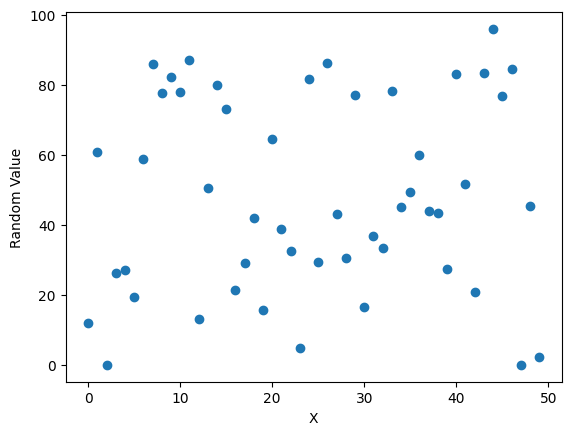

In [351]:
plt.scatter(index, y)
plt.xlabel("X")
plt.ylabel("Random Value")
plt.show()

## NN Module

In [352]:
class NNModel(nn.Module):
  def __init__(self, in_features, hidden_node_list):

    super().__init__()

    # Input layer
    self.inp = nn.Linear(in_features, hidden_node_list[0])

    # Hidden layers
    self.hidden_list = nn.ModuleList()
    for i in range(len(hidden_node_list) - 1):
      self.hidden_list.append(nn.Linear(hidden_node_list[i], hidden_node_list[i + 1]))

    # Output layer
    self.out = nn.Linear(hidden_node_list[-1], 1)

  def forward(self, X):

    X = X.float()

    # Input
    X = F.relu(self.inp(X))

    # Hidden
    for h_layer in self.hidden_list:
      X = F.relu(h_layer(X))

    # Output
    X = self.out(X)

    return X

In [353]:
# Random Hidden layers
hidden_layers = np.random.randint(low=1, high=15, size=5)
hidden_layers = np.asarray(hidden_layers)

In [354]:
hidden_layers

array([11,  3, 13, 13, 10])

In [355]:
model = NNModel(DATA_AMOUNT, [7, 5, 4, 7])

## Loss Function And Optimizer



In [356]:
loss_f = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Convert numpy to tensor

In [357]:
y = torch.from_numpy(y)

In [358]:
y

tensor([1.1925e+01, 6.0921e+01, 8.9642e-02, 2.6193e+01, 2.7266e+01, 1.9531e+01,
        5.8886e+01, 8.5844e+01, 7.7833e+01, 8.2221e+01, 7.7921e+01, 8.7083e+01,
        1.3192e+01, 5.0553e+01, 8.0008e+01, 7.3266e+01, 2.1537e+01, 2.9210e+01,
        4.2110e+01, 1.5612e+01, 6.4636e+01, 3.8769e+01, 3.2721e+01, 4.9909e+00,
        8.1548e+01, 2.9505e+01, 8.6173e+01, 4.3232e+01, 3.0723e+01, 7.7016e+01,
        1.6512e+01, 3.6925e+01, 3.3416e+01, 7.8267e+01, 4.5194e+01, 4.9498e+01,
        6.0108e+01, 4.3986e+01, 4.3299e+01, 2.7535e+01, 8.3186e+01, 5.1801e+01,
        2.0857e+01, 8.3524e+01, 9.5984e+01, 7.6888e+01, 8.4589e+01, 7.3803e-02,
        4.5523e+01, 2.2521e+00], dtype=torch.float64)

In [359]:
# Reshaping
y = torch.reshape(y, (-1, 1))
y.shape

torch.Size([50, 1])

In [360]:
y = y.float()
y.dtype

torch.float32

## One Hot Encoding

In [361]:
X = F.one_hot(index, num_classes=DATA_AMOUNT)

In [362]:
X.shape

torch.Size([50, 50])

## Training!!!

Epoch: 0
Loss: 3084.965576171875


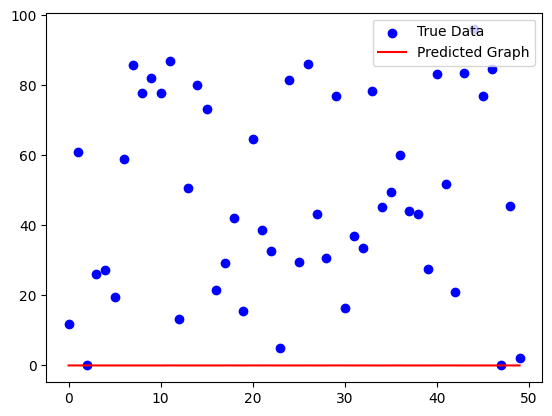

Epoch: 99
Loss: 33.83574295043945


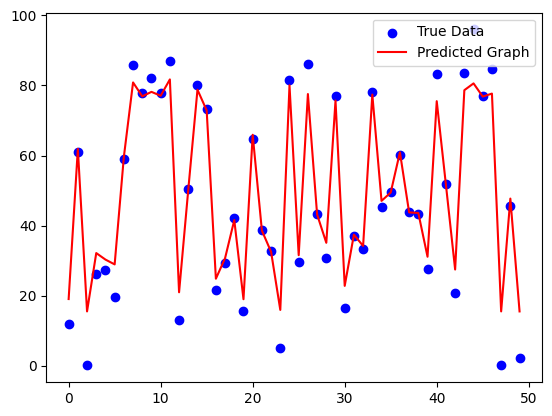

Epoch: 199
Loss: 8.894343376159668


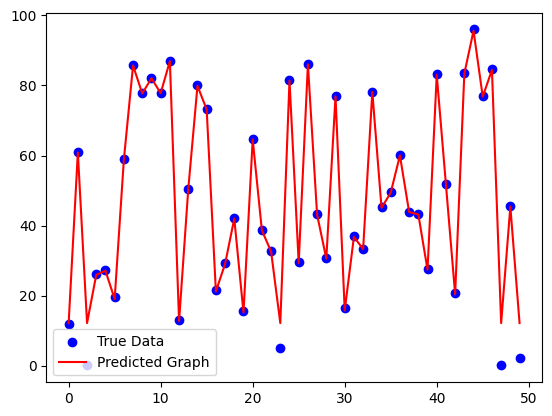

Epoch: 299
Loss: 4.995943546295166


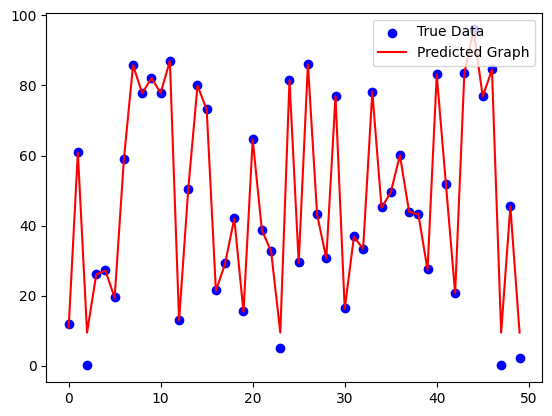

Epoch: 399
Loss: 2.6079351902008057


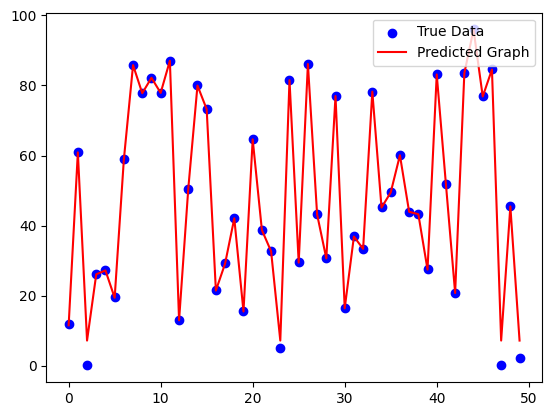

Epoch: 499
Loss: 1.3233221769332886


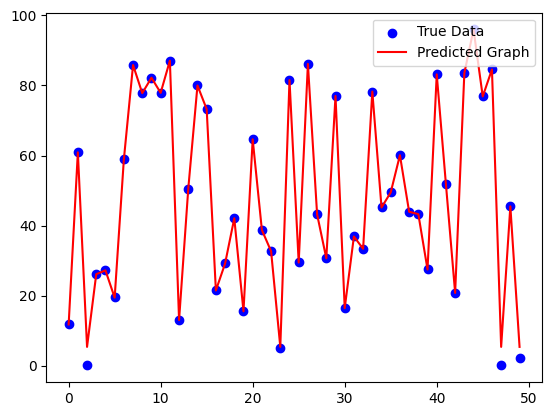

Epoch: 599
Loss: 0.6907062530517578


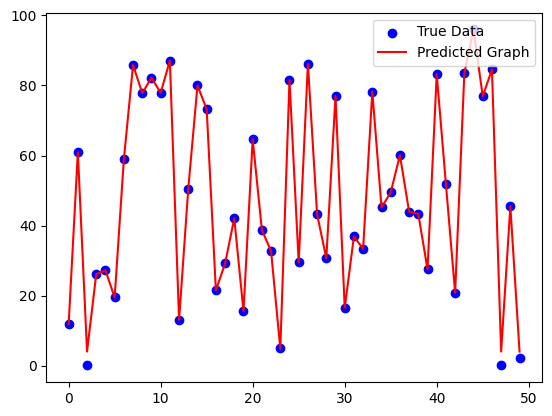

Epoch: 699
Loss: 0.35304564237594604


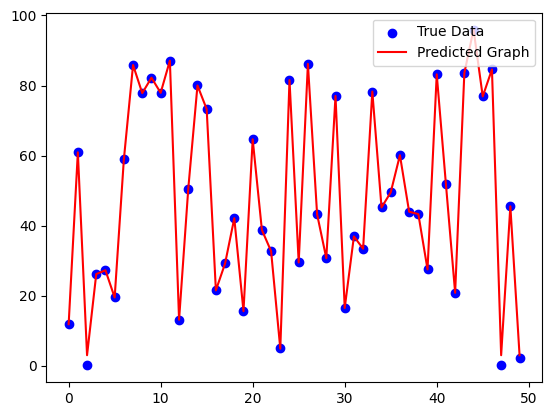

Epoch: 799
Loss: 0.18790079653263092


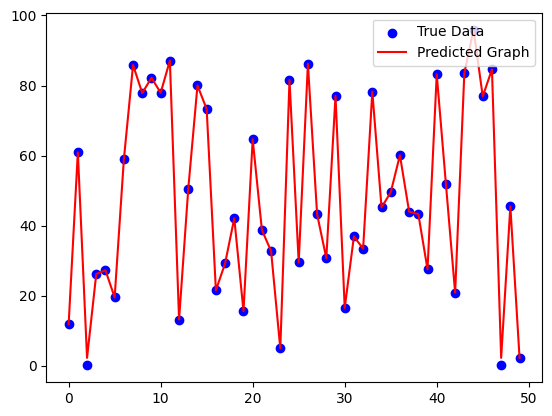

Epoch: 899
Loss: 0.12812136113643646


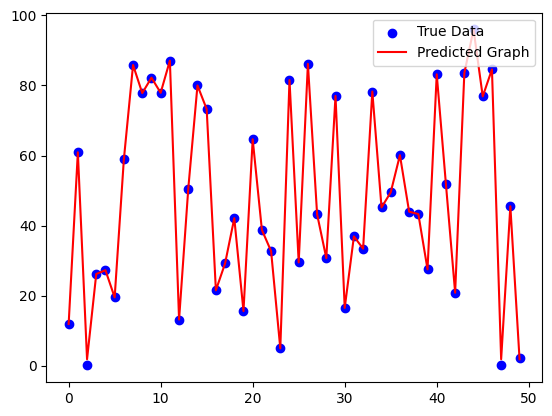

Epoch: 999
Loss: 0.09575343877077103


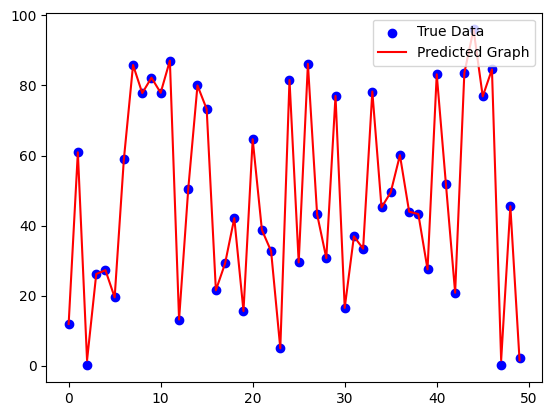

Training took: 0.09393892288208008 minutes.


In [363]:
import time
start_time = time.time()

# Hyper parameter
epochs = 1000
show_every_epochs = 100 # Show info every n epochs

# Tracking variables
losses = []

# Train loop
for ep in range(epochs):

  # Predict
  y_pred = model(X)

  # Loss
  loss = loss_f(y_pred, y)
  losses.append(loss.item())

  # Back Propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Print every n epochs
  if (ep + 1) % show_every_epochs == 0 or ep == 0:

    # Print info
    print(f"Epoch: {ep}")
    print(f"Loss: {loss.item()}")

    # Plot graph

    # True
    plt.scatter(index, y, color="b", label="True Data")

    # Predicted
    plt.plot(y_pred.detach(), color="r", label="Predicted Graph")

    plt.legend()
    plt.show()


# Calculate training time
current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes.")

## Final Result

Text(0, 0.5, 'Loss')

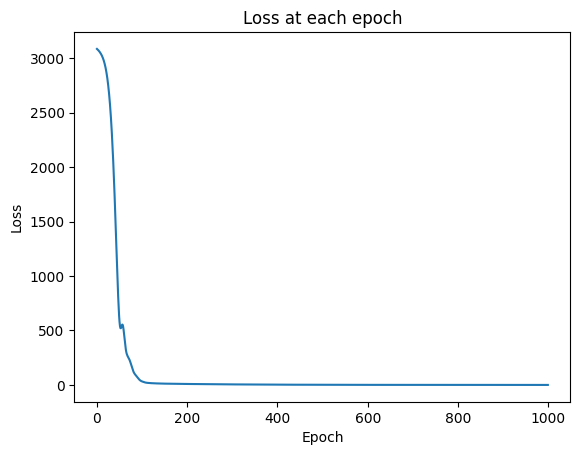

In [364]:
# Loss Graph
plt.plot(losses)
plt.title("Loss at each epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

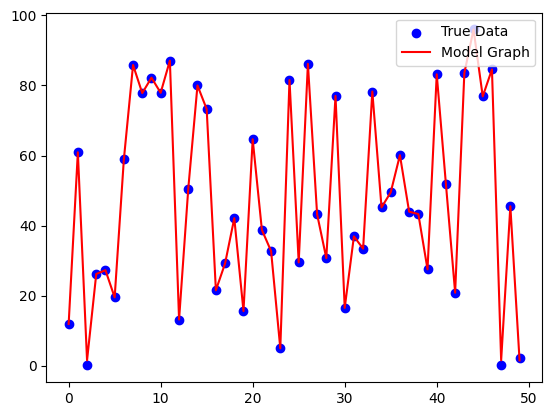

In [365]:
# Final Result Graph
with torch.no_grad():
  y_val = model(X)

  # True
  plt.scatter(index, y, color="b", label="True Data")

  # Predicted
  plt.plot(y_val, color="r", label="Model Graph")

  plt.legend()
  plt.show()